# import library

In [1]:
import os
os.sys.path
import cv2
import matplotlib.pyplot as plt
from skimage.util import random_noise
import requests
import numpy as np
import random
import shutil
import glob
import time
import io
from tkinter import ttk
import base64
from imageio import imread,imwrite
import time
from tkinter import *
from PIL import ImageTk,Image
from tkinter import filedialog

In [2]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'database_augmented',
 'dataset',
 'final.ipynb',
 'final.ipynb.tmp',
 'final_tmp.ipynb',
 'hướng dẫn cài đặt môi trường.docx',
 'README.md',
 'reconstructed.jpg',
 'requiment-install.txt',
 '~$ớng dẫn cài đặt môi trường.docx']

In [3]:
os.chdir('dataset')

In [4]:
os.listdir()

['without_mask', 'with_mask']

# define function

In [5]:
def Rotate60(img):
  rows,cols,channels= img.shape 
  M = cv2.getRotationMatrix2D((cols/2,rows/2),60,1) 
  rotate_60 = cv2.warpAffine(img,M,(cols,rows)) 
  return rotate_60

In [6]:
def Rotate30(img):
    rows,cols,channels= img.shape 
    M = cv2.getRotationMatrix2D((cols/2,rows/2),60,1) 
    rotate_30 = cv2.warpAffine(img,M,(cols,rows)) 
    return rotate_30

In [7]:
def flip(img):
  return cv2.flip(img, 1)

In [8]:
def GaussianBlur(img):
  return cv2.GaussianBlur(img, (9,9), 5)

In [9]:
def brightness(img):
    value = random.uniform( 0.5, 3)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

In [10]:
def channel_shift(img):
    value = int(random.uniform(-60, 60))
    img = img + value
    img[:,:,:][img[:,:,:]>255]  = 255
    img[:,:,:][img[:,:,:]<0]  = 0
    img = img.astype(np.uint8)
    return img

In [11]:
def noiseImg(img):
  noise_img = random_noise(image, mode='s&p',amount=0.5)


  # The above function returns a floating-point image
  # on the range [0, 1], thus we changed it to 'uint8'
  # and from [0,255]
  return np.array(255*noise_img, dtype = 'uint8')

In [12]:
def load_img(url):
    return cv2.imread(url)


In [13]:
def encode_img(image):
    _, byte = cv2.imencode('.png', image)
    encode_image = base64.b64encode(byte)
    decoded_image = base64.b64decode(encode_image)
    return decoded_image
    


In [14]:
def decode_img(decoded_image):
    return imread(io.BytesIO(decoded_image))

In [15]:
def show_img(img):
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

In [16]:
def save_img(filename,img):
  save_img(filename, img)

In [17]:
def convertToBinaryData(filename):
    # Convert digital data to binary format
    with open(filename, 'rb') as file:
        binaryData = file.read()
    return binaryData

# create variable constant

In [18]:
methods=['60','30','Flip','GaussianBlur','Brightness','channel_shift','noise_img']

In [19]:
function_methods=[Rotate60,Rotate30,flip,GaussianBlur,brightness,channel_shift,noiseImg]

In [20]:
DIRECTORY=os.getcwd()
CATEGORIES = ["with_mask", "without_mask"]

In [21]:
print(DIRECTORY)

C:\Users\admin\Documents\MSIS4013\dataset


In [22]:
import glob
print(glob.glob(DIRECTORY+'/*'))

['C:\\Users\\admin\\Documents\\MSIS4013\\dataset\\without_mask', 'C:\\Users\\admin\\Documents\\MSIS4013\\dataset\\with_mask']


In [23]:
time_summary =[]
time_execution = []


# 1. Mysql xampp

In [24]:
import mysql.connector

# connect mysql

In [25]:
connection = mysql.connector.connect(host='localhost',
                                     database='augmented',
                                     user='root',
                                     password='')

cursor = connection.cursor()
        

# delete all data in database

In [26]:
cursor.execute('delete from image_processing')
connection.commit()
cursor.execute('delete from method_processing')
cursor.execute('delete from original_image')
connection.commit()

# import name method

In [27]:
start =time.time()
try:
    for method in methods:
        value=(method)
        my_string = "INSERT INTO method_processing (name_method) VALUES ('{}')".format(method)
        print(my_string)
        cursor.execute(my_string)
except mysql.connector.Error as error:
    print("Failed inserting BLOB data into MySQL table {}".format(error))
end =time.time()
time_execution.append(end-start)

INSERT INTO method_processing (name_method) VALUES ('60')
INSERT INTO method_processing (name_method) VALUES ('30')
INSERT INTO method_processing (name_method) VALUES ('Flip')
INSERT INTO method_processing (name_method) VALUES ('GaussianBlur')
INSERT INTO method_processing (name_method) VALUES ('Brightness')
INSERT INTO method_processing (name_method) VALUES ('channel_shift')
INSERT INTO method_processing (name_method) VALUES ('noise_img')


In [28]:
#print(end-start)

# print name method in database

In [29]:
start=time.time()
cursor.execute("SELECT * FROM method_processing")

myresult = cursor.fetchall()

for x in myresult:
    print(x)
end=time.time()
time_execution.append(end-start)

(64, '60')
(65, '30')
(66, 'Flip')
(67, 'GaussianBlur')
(68, 'Brightness')
(69, 'channel_shift')
(70, 'noise_img')


# import image from local to datbase

In [30]:
start=time.time()
try:
    for category in CATEGORIES:
        path = os.path.join(DIRECTORY, category,'origin')
        for img in os.listdir(path)[0:5]:
            img_path = os.path.join(path, img)
            image=load_img(img_path)
            encode_image=encode_img(image)
            sql = "INSERT INTO original_image (image,label_img) VALUES (%s,%s)"
            cursor.execute(sql, (encode_image,category,))
except mysql.connector.Error as error:
    print("Failed inserting BLOB data into MySQL table {}".format(error))
end=time.time()
time_execution.append(end-start)

# read image in database

In [31]:
start=time.time()
cursor.execute("SELECT * FROM original_image")

myresult = cursor.fetchall()

for x in myresult:
    print(x)
end=time.time()
time_execution.append(end-start)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [32]:
#print(end-start)

In [33]:
time_summary.append(time_execution)
time_execution=[]

# show image

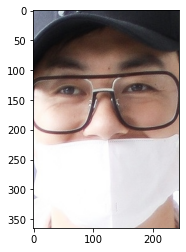

In [34]:
encode_image = myresult[0][1]

image = decode_img(encode_image)
plt.figure()
plt.imshow(image, cmap="gray")
plt.show()

# create augmented data and store it in the database

In [35]:
cursor.execute("SELECT * FROM method_processing where name_method = '60'")

list_method_processing = cursor.fetchall()

In [36]:
print(list_method_processing[0][0])

64


In [37]:
cursor.execute("SELECT * FROM original_image")

myresult = cursor.fetchall()
for x in myresult:
    encode_image = x[1]
    image = decode_img(encode_image)
    image_processing =function_methods[0](image)
    encode_image_processing=encode_img(image_processing)
    id_original_image=x[0]
    id_method=list_method_processing[0][0]
    sql = "INSERT INTO image_processing (id_original_image,id_method,image) VALUES (%s,%s,%s)"

    cursor.execute(sql, (id_original_image,id_method,encode_image_processing ,))
    print(id_original_image,id_method)

81 64
82 64
83 64
84 64
85 64
86 64
87 64
88 64
89 64
90 64


In [38]:
cursor.execute("SELECT * FROM image_processing")
list_image_processing = cursor.fetchall()

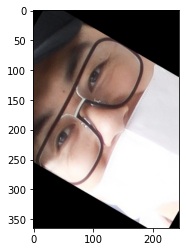

In [39]:
encode_image=list_image_processing[0][2]
image=decode_img(encode_image)
show_img(image)

In [40]:
connection.commit()

In [41]:
connection.close()

# 2. Oracle SQL

In [42]:
import cx_Oracle



# connect Oracle SQL

In [43]:
#dsn_tns = cx_Oracle.makedsn('Host Name', 'Port Number', service_name='Service Name') # if needed, place an 'r' before any parameter in order to address special characters such as '\'.
dsn_tns = cx_Oracle.makedsn('localhost', '1521', service_name='orcl') # if needed, place an 'r' before any parameter in order to address special characters such as '\'.
conn = cx_Oracle.connect(user=r'C##augmented', password='augmented', dsn=dsn_tns) # if needed, place an 'r' before any parameter in order to address special characters such as '\'. For example, if your user name contains '\', you'll need to place 'r' before the user name: user=r'User Name'

c = conn.cursor()

# delete all data in database

In [44]:
c.execute('delete from  image_processing') 
conn.commit()
c.execute('delete from  method_processing') 
c.execute('delete from  original_image') 
conn.commit()

# import name method

In [45]:
start=time.time()
for method in methods:
    print(method)
    value=(method,)
    c.execute( "INSERT INTO method_processing (name_method) VALUES (:0)",(method,))
end=time.time()
time_execution.append(end-start)

60
30
Flip
GaussianBlur
Brightness
channel_shift
noise_img


# print name method in database

In [46]:
start=time.time()

list_method_processing=c.execute('select * from  method_processing ') 
for x in list_method_processing:
    print (x[0], '-', x[1])
end=time.time()
#print(end-start)
time_execution.append(end-start)

76 - 60
77 - 30
78 - Flip
79 - GaussianBlur
80 - Brightness
81 - channel_shift
82 - noise_img


In [47]:
conn.commit()

# import image from local to datbase

In [48]:
start=time.time()
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category,'origin')
    for img in os.listdir(path)[0:5]:
        img_path = os.path.join(path, img)          
        image=load_img(img_path)
        encode_image=encode_img(image)
        c.execute( "INSERT INTO original_image (image,label_img) VALUES (:0,:1)",(encode_image,category))
        
end=time.time()
#print(end-start)
time_execution.append(end-start)

# read image in database

In [49]:
start=time.time()
c.execute('select * from  original_image ') 
list_original_images=c.fetchall()
for row in list_original_images:
    print (row)
end=time.time()
#print(end-start)
time_execution.append(end-start)

(71, <cx_Oracle.LOB object at 0x0000011C4043A8D0>, 'with_mask')
(72, <cx_Oracle.LOB object at 0x0000011C4043A240>, 'with_mask')
(73, <cx_Oracle.LOB object at 0x0000011C4043A930>, 'with_mask')
(74, <cx_Oracle.LOB object at 0x0000011C4043A480>, 'with_mask')
(75, <cx_Oracle.LOB object at 0x0000011C4043A5A0>, 'with_mask')
(76, <cx_Oracle.LOB object at 0x0000011C4043A750>, 'without_mask')
(77, <cx_Oracle.LOB object at 0x0000011C4043A540>, 'without_mask')
(78, <cx_Oracle.LOB object at 0x0000011C4043A1E0>, 'without_mask')
(79, <cx_Oracle.LOB object at 0x0000011C4043AD80>, 'without_mask')
(80, <cx_Oracle.LOB object at 0x0000011C4043ADB0>, 'without_mask')


In [50]:
time_summary.append(time_execution)
time_execution=[]

# show image

In [51]:
encode_image= list_original_images[0][1].read()

In [52]:
#print(img)

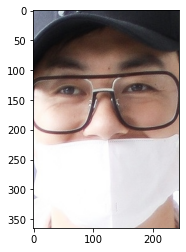

In [53]:
image = decode_img(encode_image)
plt.figure()
plt.imshow(image, cmap="gray")
plt.show()

# create augmented data and store it in the database

In [54]:
start=time.time()
list_method_processing=[]

c.execute('select * from  method_processing ') 
list_method_processing=c.fetchall()
for x in list_method_processing:
    print (x[0], '-', x[1])
end=time.time()
#print(end-start)
time_execution.append(end-start)

76 - 60
77 - 30
78 - Flip
79 - GaussianBlur
80 - Brightness
81 - channel_shift
82 - noise_img


In [55]:
print(list_method_processing[0][0])

76


In [56]:
c.execute("SELECT * FROM original_image")

list_original_images=c.fetchall()

#print(list_original_images)


for x in list_original_images:
    encode_image = x[1].read()
    image = decode_img(encode_image)
    image_processing =function_methods[0](image)
    encode_image_processing=encode_img(image_processing)
    id_original_image=x[0]
    id_method=list_method_processing[0][0]
    c.execute("INSERT INTO image_processing (id_original_image,id_method,image) VALUES (:0,:1,:2)",(id_original_image,id_method,encode_image_processing))
    #print(id_original_image,id_method,)
    

In [57]:
c.execute('select * from  image_processing ') 
list_image_processing=c.fetchall()

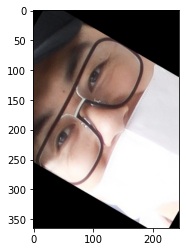

In [58]:
encode_image=list_image_processing[0][2].read()
image=decode_img(encode_image)
show_img(image)

In [59]:
conn.commit()

In [60]:
conn.close()

# 3. Mongodb

In [5]:
from pymongo import MongoClient

# connect mongodb 

In [41]:
connection = MongoClient("localhost", 27017)

database = connection['final4013']

In [51]:
print(database.list_collection_namzes())


[]


# delete all data in database

In [46]:
method_col = database["method_processing"]
original_image_col = database["original_image"]
image_processing_col = database["image_processing"]
z

In [50]:
method_col.delete_many({})
original_image_col.delete_many({})
image_processing_col.delete_many({})

# import name method

In [66]:
start=time.time()
for method in methods:
    #print(i)
    name_method = {
        "name_method":method
        }
    method_col.insert_one(name_method)

end=time.time()
time_execution.append(end-start)
#print(end-start)


# print name method in database

In [67]:
start=time.time()
cursor = method_col.find()
for record in cursor:
    print(record)
end=time.time()
#print(end-start)
time_execution.append(end-start)

{'_id': ObjectId('62bc7bb13d4b6f346b05dd2d'), 'name_method': '60'}
{'_id': ObjectId('62bc7bb13d4b6f346b05dd2e'), 'name_method': '30'}
{'_id': ObjectId('62bc7bb13d4b6f346b05dd2f'), 'name_method': 'Flip'}
{'_id': ObjectId('62bc7bb13d4b6f346b05dd30'), 'name_method': 'GaussianBlur'}
{'_id': ObjectId('62bc7bb13d4b6f346b05dd31'), 'name_method': 'Brightness'}
{'_id': ObjectId('62bc7bb13d4b6f346b05dd32'), 'name_method': 'channel_shift'}
{'_id': ObjectId('62bc7bb13d4b6f346b05dd33'), 'name_method': 'noise_img'}


# import image from local to datbase

In [68]:
start=time.time()
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category,'origin')
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        #print(img_path)
        #image = load_img(img_path)

        #print(image)
        #image = convertToBinaryData(img_path)
        image=load_img(img_path)
        encode_image=encode_img(image)
        #thedata = open('thefile', 'rb').read()
        #print(image)
        or_image = {
        "image":encode_image,
        "label":category,
        }
        original_image_col.insert_one(or_image)
end=time.time()
#print(end-start)
time_execution.append(end-start)

# read image in database

In [69]:
start=time.time()
original_images = original_image_col.find()
for record in original_images:
    #print(record['_id'])    
    print(record)
end=time.time()
#print(end-start)
time_execution.append(end-start)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [70]:
#print(end-start)

In [71]:
time_summary.append(time_execution)
time_execution=[]

# show image

In [72]:
original_images = list(original_image_col.find())

In [73]:
#print(original_images[0]['image'])

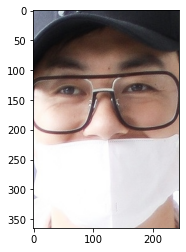

In [74]:
encode_image =original_images[0]['image']
image=decode_img(encode_image)

plt.figure()
plt.imshow(image, cmap="gray")
plt.show()

# create augmented data and store it in the database 

In [75]:
cursor = method_col.find({'name_method': '60'})
for record in cursor:
    print(record['_id'])
id_method = record['_id']

62bc7bb13d4b6f346b05dd2d


In [76]:
print(id_method)

62bc7bb13d4b6f346b05dd2d


In [77]:
original_images = original_image_col.find()
for record in original_images:
    id_original_image=record['_id']  
    encode_image = record['image']
    image = decode_img(encode_image)
    image_processing =function_methods[0](image)
    encode_image_processing=encode_img(image_processing)
    inf_image_processing = {
        "id_original_image":id_original_image,
        "id_method":id_method,
        "image":encode_image_processing
        }
    image_processing_col.insert_one(inf_image_processing)


# time summarry

In [78]:
for i in time_summary:
    print(i)

[0.003998994827270508, 0.0030028820037841797, 0.18700647354125977, 0.021996259689331055]
[0.0060002803802490234, 0.003058195114135742, 0.1250615119934082, 0.0019969940185546875]
[0.0029985904693603516, 0.008006811141967773, 0.003000497817993164, 1.2370223999023438, 0.21999382972717285]


In [79]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

# reference
- https://appdividend.com/2020/06/23/how-to-convert-image-to-base64-string-in-python/
- https://stackoverflow.com/questions/58861577/differences-between-pil-image-open-and-cv2-imdecode
- https://note.nkmk.me/en/python-opencv-bgr-rgb-cvtcolor/
- https://sqlserverguides.com/how-to-store-images-in-mongodb/
- https://datatofish.com/how-to-connect-python-to-an-oracle-database-using-cx_oracle/

# Script sql

In [ ]:
break 

In [ ]:
#https://sqlserverguides.com/how-to-store-images-in-mongodb/
#https://datatofish.com/how-to-connect-python-to-an-oracle-database-using-cx_oracle/

# xampp

In [ ]:
create DATABASE augmented;
use augmented;
create table method_processing(
    id_method int PRIMARY KEY AUTO_INCREMENT,
    name_method varchar(30) 
) ENGINE = InnoDB DEFAULT CHARSET = utf8mb4;

-- INSERT INTO  method_processing (name_method) VALUES (name_method)



create table original_image(
    id_original_image int PRIMARY KEY AUTO_INCREMENT,
    image LONGBLOB NOT NULL,
    label_img varchar(20) not null
) ENGINE = InnoDB DEFAULT CHARSET = utf8mb4;
 
    
-- INSERT INTO  original_image (image,label_img) VALUES (image,label_img)
    
    
create table image_processing(
    id_original_image int ,
    id_method int,
    image LONGBLOB NOT NULL,
    primary key (id_original_image, id_method),
    FOREIGN KEY (id_original_image) REFERENCES original_image(id_original_image),
    FOREIGN KEY (id_method) REFERENCES method_processing(id_method)

) ENGINE = InnoDB DEFAULT CHARSET = utf8mb4;

# oracle 

In [ ]:



create table method_processing(
    id_method number(10) PRIMARY KEY,
    name_method varchar(30) 
);

CREATE SEQUENCE method_SEQ;


-- create tigger using the sequence
CREATE OR REPLACE TRIGGER method_TRG 
BEFORE INSERT ON method_processing 
FOR EACH ROW
WHEN (new.id_method IS NULL)
BEGIN
  SELECT method_SEQ.NEXTVAL
  INTO   :new.id_method
  FROM   dual;
END;



--INSERT INTO method_processing (name_method) VALUES ('a');


commit;

  

  
  
create table original_image(
    id_original_image number(10) PRIMARY KEY ,
    image bfile NOT NULL
);

CREATE SEQUENCE original_image_SEQ;


-- create tigger using the sequence
CREATE OR REPLACE TRIGGER original_image_TRG 
BEFORE INSERT ON original_image 
FOR EACH ROW
WHEN (new.id_original_image IS NULL)
BEGIN
  SELECT original_image_SEQ.NEXTVAL
  INTO   :new.id_original_image
  FROM   dual;
END;



create table imageprocessing(
    id_original_image number(10) ,
    id_method number(10),
    image bfile NOT NULL,
    primary key (id_original_image, id_method),
    FOREIGN KEY (id_original_image) REFERENCES original_image(id_original_image),
    FOREIGN KEY (id_method) REFERENCES method_processing(id_method)

);






INSERT INTO print_media (product_id, ad_id, ad_graphic)
   VALUES (3000, 31001, 
      BFILENAME('MEDIA_DIR', 'modem_comp_ad.gif'));